In [1]:
import pandas as pd
import seaborn as sns

In [3]:
detections = pd.read_csv('/Users/swbrown/Desktop/remote_data/d_sbrown/FKNMS/output/wdr_detection_info.csv')

# read in merge scene list
merged_sceneTimes = pd.read_csv('/Users/swbrown/Desktop/remote_data/d_sbrown/FKNMS/output/merged_scene_summary.csv')

# read in rms for each scene
scene_rms = pd.read_csv('/Users/swbrown/Desktop/remote_data/d_sbrown/FKNMS/data/rms_bands.csv')

In [33]:
detections['sceneTime'] = pd.to_datetime(detections['sceneTime'])
scene_rms['sceneTime'] = pd.to_datetime(scene_rms['sceneTime'])
boat_totals = merged_sceneTimes.drop(columns= ['merged_info','matches','scenes'])
boat_totals['sceneTime'] = pd.to_datetime(boat_totals['merged_timestamp'])


datetime64[ns]


In [37]:
# create function to map sound properties to detections/sceneTimes
def map_sound_properties(detections, scene_rms):
    # Sort the detections DataFrame by 'sceneTime'
    detections_sorted = detections.sort_values('sceneTime')
    # Join the two dataframes based on sceneTime within two seconds
    merged_df = pd.merge_asof(detections_sorted, scene_rms, on='sceneTime', tolerance=pd.Timedelta(seconds=2))
    
    # Print the merged dataframe
    return merged_df

In [40]:
# Create table with all detections and associated scene RMS values
detections_rms = map_sound_properties(detections, scene_rms)

# Create table with all scenes and associated scene RMS values with total counts of each boat type
scene_totals_rms = map_sound_properties(scene_rms, boat_totals)


<Axes: xlabel='boats_combined', ylabel='RMS_100-500'>

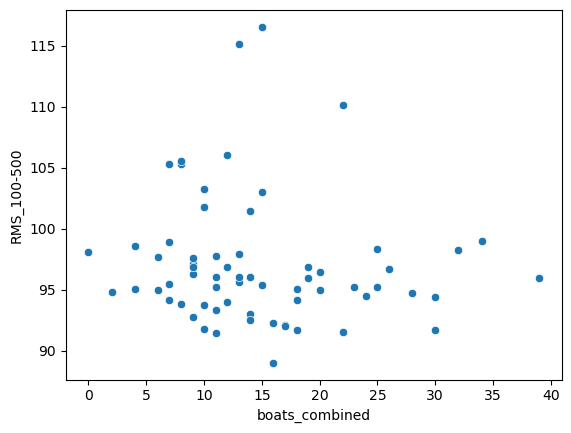

In [61]:
sns.scatterplot(data=scene_totals_rms, x='boats_combined', y='RMS_100-500')

<Axes: xlabel='wake_combined', ylabel='RMS_100-500'>

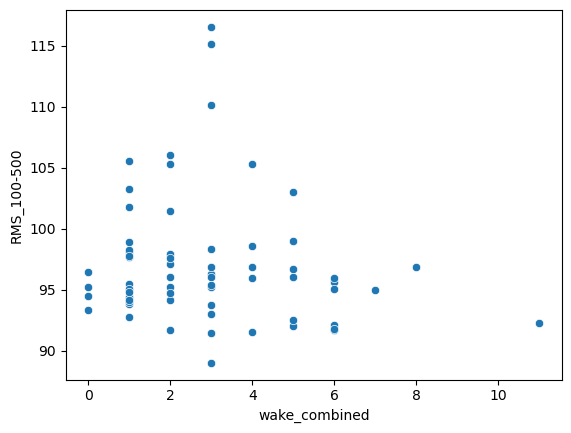

In [62]:
sns.scatterplot(data=scene_totals_rms, x='wake_combined', y='RMS_100-500')

<Axes: xlabel='dist_to_hydrophone', ylabel='RMS_100-500'>

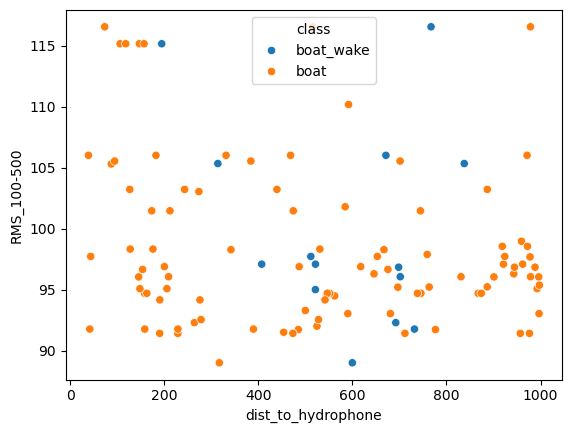

In [47]:
sns.scatterplot(data = detections_rms[detections_rms['dist_to_hydrophone']<1000], x = 'dist_to_hydrophone', y = 'RMS_100-500', hue = 'class')

In [ ]:
# To Do:
# 1. Create a plot with a scene, and the detections (map/imagery) on the left, and on the right, the spectrogram for that scene
# 2. Convert scene_totals_rms and detections_rms to a long format?
    # Facet on boat type, facet on RMS level